# Compte Rendu TP2 Optimisation
## Nom: $KADI$
## Prénom: $Koussaila$

## Groupe : $B$ 

 # --------------------------------------------------------------------

# Dichotomie : 

### fonction $dichotomie($xmin$,$xmax$)$

In [11]:
import numpy as np 
import matplotlib.pyplot as plt

# la fonction dichotomie() pour la fonction f(x)

def dichotomie(xmin,xmax):
    # déterminer les 4 sous intervals 
    x1,x5=xmin,xmax
    x3=(x1+x5)/2     
    x2=(x1+x3)/2
    x4=(x3+x5)/2
    # creation des intervals :
    interval=np.array([(x1,x1,x2,x3,x4),(x2,x3,x4,x5,x5)])
    interval.T # transposer la matrice 2D 
    """ [x1,x2] : interval 1
        [x1,x3] : interval 2
        [x2,x4] : interval 3
        [x3,x5] : interval 4
        [x4,x5] : interval 5
    """
    
    # déterminer les y(x)=f(x)
    y1=f1(x1)
    y2=f1(x2)
    y3=f1(x3)
    y4=f1(x4)
    y5=f1(x5)
    # comparer les valeur de y(x)
    if y1<y2 and y2<y3 and y3<y4 and y4<y5 :
        return [row[0] for row in interval]  # récupérer l'interval [x1,x2] sous forme d'une liste
    
    if y1>y2 and y2<y3 and y3<y4 and y4<y5 :
        return [row[1] for row in interval]
    
    if y1>y2 and y2>y3 and y3<y4 and y4<y5 :
        return [row[2] for row in interval]
    
    if y1>y2 and y2>y3 and y3>y4 and y4<y5 :
        return [row[3] for row in interval]
    
    if y1>y2 and y2>y3 and y3>y4 and y4>y5 :
        return [row[4] for row in interval]

### fonction $minimumDichotomie($f,x_min,x_max,precision$)$

In [12]:
def minimumDichotomie(f,x_min,x_max,precision):
    #creation de deux listes vides :
    bornes_min=[[],[]]
    bornes_max=[[],[]]
    # initialisation des variables 
    n_iter=0
    xmin,xmax=x_min,x_max
    
    ier=False
    try :
        while (xmax-xmin)>precision:
            # renvoyer le nombre d'itération 
            n_iter+=1
            # test d'interval où il y a le minimum avec la fontion dichotomie() :
            xmin,xmax=dichotomie(xmin,xmax) # récupération des xmin, et xmax
        
            bornes_min[0].append(xmin)
            bornes_min[1].append(f(xmin))
        
            bornes_max[0].append(xmax)
            bornes_max[1].append(f(xmax))
        
    except:
        ier=True # si le programme arriver jusqu'ici donc on considère qu'il y a pas d'erreur 
    return  [np.asarray(bornes_min), np.asarray(bornes_max), n_iter, ier]
    

Text(1, -5, 'Precision = 0.1\nCV en 7 iterations\nBorne inférieure :\n  x_min = -1.4688\n  y_min = -6.7439\nBorne supérieure :\n  x_max = -1.4062\n  y_max = -6.7404\n False')

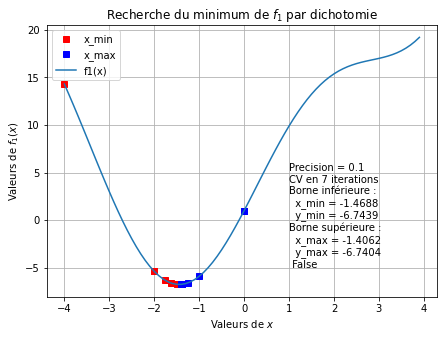

In [13]:
# -*- coding: utf-8 -*-
"""
Created on Sat Oct 17 10:25:15 2020

UE MU4MEN01 - Introduction à l'optimisation

Programme cadre pour le TP n°2

@author: Florence Ossart, Sorbonne Université
"""

#%% Programme de test de la recherche de minimum par dichotomie

#%% Fonction test n°1
def f1(x) :
    return (x+1)**2 + 7*np.sin(x)


#%% Recherche du minimum de f1 sur l'intervalle [-4,4]
x_min = -4
x_max = +4


f = f1
precision = 1e-1

t=np.arange(x_min,x_max,precision)
# METHODE minimumDichotomie A CREER
bornes_min, bornes_max, n_iter, ier = minimumDichotomie(f,x_min,x_max,precision)
#
x_min, y_min = bornes_min[0][-1], bornes_min[1][-1]
x_max, y_max = bornes_max[0][-1], bornes_max[1][-1]

# Visualisation des résultats
plt.figure(figsize=(7,5))
plt.plot(bornes_min[0],bornes_min[1],'rs', label = 'x_min')
plt.plot(bornes_max[0],bornes_max[1],'bs', label = 'x_max')
plt.plot(t,f1(t),label='f1(x)')
plt.legend()
plt.xlabel('Valeurs de $x$')
plt.ylabel('Valeurs de $f_1(x)$')
plt.title('Recherche du minimum de $f_1$ par dichotomie')
plt.grid()

message  = 'Precision = {}'.format(precision)
message += '\nCV en {} iterations'.format(n_iter)
message += '\nBorne inférieure :'
message += '\n  x_min = {:6.4f}'.format(x_min)
message += '\n  y_min = {:6.4f}'.format(y_min)
message += '\nBorne supérieure :'
message += '\n  x_max = {:6.4f}'.format(x_max)
message += '\n  y_max = {:6.4f}'.format(y_max)
message += '\n {}'.format(ier)
plt.text(1,-5,message)


### test du programme sur la fonction $f2(t)$

Text(1, -5, 'Precision = 0.1\nCV en 7 iterations\nBorne inférieure :\n  x_min = -1.4688\n  y_min = -9.7283\nBorne supérieure :\n  x_max = -1.4062\n  y_max = -9.6999')

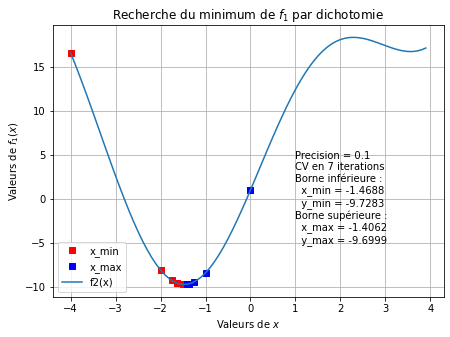

In [14]:
def f2(x):
    return (x+1)**2 + 10*np.sin(x)


#%% Recherche du minimum de f1 sur l'intervalle [-4,4]
x_min = -4
x_max = +4

f = f2
precision = 1e-1

t=np.arange(x_min,x_max,precision)
# METHODE minimumDichotomie A CREER
bornes_min, bornes_max, n_iter, ier = minimumDichotomie(f,x_min,x_max,precision)
#
x_min, y_min = bornes_min[0][-1], bornes_min[1][-1]
x_max, y_max = bornes_max[0][-1], bornes_max[1][-1]

# Visualisation des résultats
plt.figure(figsize=(7,5))
plt.plot(bornes_min[0],bornes_min[1],'rs', label = 'x_min')
plt.plot(bornes_max[0],bornes_max[1],'bs', label = 'x_max')
plt.plot(t,f2(t),label='f2(x)')
plt.legend()
plt.xlabel('Valeurs de $x$')
plt.ylabel('Valeurs de $f_1(x)$')
plt.title('Recherche du minimum de $f_1$ par dichotomie')
plt.grid()

message  = 'Precision = {}'.format(precision)
message += '\nCV en {} iterations'.format(n_iter)
message += '\nBorne inférieure :'
message += '\n  x_min = {:6.4f}'.format(x_min)
message += '\n  y_min = {:6.4f}'.format(y_min)
message += '\nBorne supérieure :'
message += '\n  x_max = {:6.4f}'.format(x_max)
message += '\n  y_max = {:6.4f}'.format(y_max)
plt.text(1,-5,message)




### il faut faire attention sur l'interval où on étudier notre fonction car on peut avoir deux minimums locaux ce ne va pas être facile à trouver le bon minimum

# méthode de Newton 

### fonction dérivée:

In [15]:
from sympy import symbols
import sympy as sy

# la fonction dérivée 1 et 2 eme ordre
def derivee(f):
    
    x, y = symbols('x y') 
    f = sy.sympify(f)
    print("avant la dérivée: f(x)= {}".format(f)) 
  
    # 1 ere dérivée: 
    d1f = sy.diff(f1, x)
    print('f\'(x)=: {}'.format(d1f))
    
    # 2ème dérivée
    d2f = sy.diff(f1,x,x)
    print('f\'\'(x)= {}'.format(d2f)) 
    
    # convertir en fonction
    d1f=sy.lambdify(x,d1f)
    d2f=sy.lambdify(x,d2f)
    
    return d1f,d2f

### mes fonctions à dérivées

In [16]:
f1= "(x+1)**2 + 7*sin(x)"
f2= "(x+1)**2 + 10*sin(x)"

def f_1(x):
    return (x+1)**2 + 7*np.sin(x)
def f_2(x):
    return (x+1)**2 + 10*np.sin(x)

# test des dérivées: 
d1f,d2f= derivee(f1) #  test de dérivée de f1(x) 

type(d1f)

avant la dérivée: f(x)= (x + 1)**2 + 7*sin(x)
f'(x)=: 2*x + 7*cos(x) + 2
f''(x)= 2 - 7*sin(x)


function

### Méthode de Newton :
    

In [17]:
def newton(f,d1f,d2f,x0,precision,iter_max):
    uN=precision+1
    x=[]
    i=0
    ier = False
    try:
        while (f(x0)!=0) and (abs(uN)>precision) and i<iter_max:
            uN=d1f(x0)/d2f(x0)
            x0-=uN
            x.append(x0)
            i+=1
            
    except:
        ier= True
    return x,x0,n_iter,ier

### test de la méthode de newton

le minimum est à xn= -1.4438215156925167


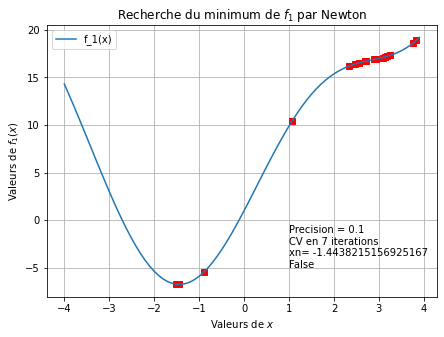

In [18]:
precision=1e-1
f=f_1 # f1(x)

# appel à la méthode de Newton
x,x0,n_iter,ier=newton(f,d1f,d2f,2,precision,100)


xmin = -4
xmax = +4
t=np.arange(xmin,xmax,precision)


y=[]
#représenter les points xn sur le graphe:
for xn in x:
    y.append(f_1(xn))

np.asarray(y)

# Visualisation des résultats
plt.figure(figsize=(7,5))
plt.plot(x,y,'rs')
plt.plot(t,f_1(t),label='f_1(x)')
plt.legend()
plt.xlabel('Valeurs de $x$')
plt.ylabel('Valeurs de $f_1(x)$')
plt.title('Recherche du minimum de $f_1$ par Newton')
plt.grid()

message  = 'Precision = {}'.format(precision)
message += '\nCV en {} iterations'.format(n_iter)
message += '\nxn= {}'.format(x0)
message += '\n{}'.format(ier)
plt.text(1,-5,message)

print("le minimum est à xn=", x0)